In [1]:
from pathlib import Path

import os 
os.environ["OMP_NUM_THREADS"] = "1" # This is done to set 
# OMP_NUM_THREADS to 1 for comparison of various k in 
# k-Means clustering.

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import pairwise
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from pandas.plotting import parallel_coordinates

%matplotlib inline
import matplotlib.pylab as plt

In [3]:
# Create data frame for Utilities data set.
rates_df = pd.read_csv('Crime.csv')

# Determine dimensions of dataframe. 
print('Data Set Dimensions:', rates_df.shape)

# Set row names (index) to 'States', which is utilities
# column name. 
rates_df.set_index('States', inplace=True)

# Display the first 10 records of utilities_df data frame.
rates_df.head(10)

Data Set Dimensions: (50, 8)


,murder,rape,robbery,assault,burglary,larceny,auto
States,,,,,,,
ALABAMA,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
ALASKA,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
ARIZONA,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
ARKANSAS,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
CALIFORNIA,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5
COLORADO,6.3,42.0,170.7,292.9,1935.2,3903.2,477.1
CONNECTICUT,4.2,16.8,129.5,131.8,1346.0,2620.7,593.2
DELAWARE,6.0,24.9,157.0,194.2,1682.6,3678.4,467.0
FLORIDA,10.2,39.6,187.9,449.1,1859.9,3840.5,351.4


# Normalizing the  crime data and display it. 

In [5]:
# Use Pandas for normalizing states' crime rates. 
rates_df_norm = (rates_df - rates_df.mean())/rates_df.std()
rates_df_norm_round = np.round((rates_df - rates_df.mean())/rates_df.std(), 
                          decimals=2)

# Display records of normalized data frame.
print('Normalized Values for First 10 Records')
rates_df_norm_round.head(10)

Normalized Values for First 10 Records


,murder,rape,robbery,assault,burglary,larceny,auto
States,,,,,,,
ALABAMA,1.75,-0.05,-0.31,0.67,-0.36,-1.09,-0.50
ALASKA,0.87,2.40,-0.31,0.73,0.09,0.96,1.94
ARIZONA,0.53,0.79,0.16,1.01,2.44,2.47,0.32
ARKANSAS,0.35,0.17,-0.46,-0.08,-0.74,-1.11,-1.00
CALIFORNIA,1.05,2.20,1.84,1.46,1.96,1.14,1.48
COLORADO,-0.30,1.51,0.53,0.81,1.49,1.70,0.51
CONNECTICUT,-0.84,-0.83,0.06,-0.79,0.13,-0.07,1.12
DELAWARE,-0.37,-0.08,0.37,-0.17,0.90,1.39,0.46
FLORIDA,0.71,1.29,0.72,2.37,1.31,1.61,-0.14


# Develop and plot hierachical dendrograms with average linkage method.

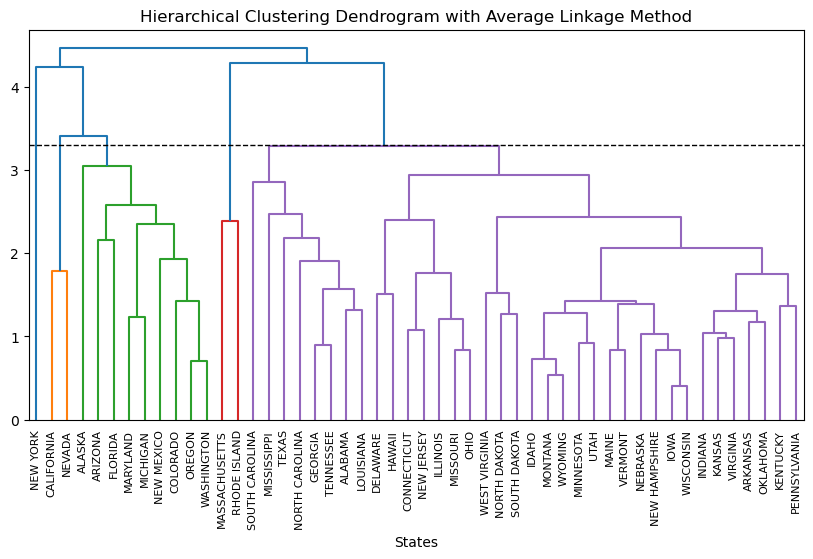

In [6]:
# Develop hierarchical (agglomerative) clustering using average 
# linkage (average distance) for clustering. 
hi_average = linkage(rates_df_norm, method='average')

# Develop plot parameters, title and labels.  
fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram with Average Linkage Method')
plt.xlabel('States')

# Use dendrogram() function to develop hierarchical clustering deondrogram
# clusters with average linkage (average distance). 
# 'color_threshold = 3.3' represents the threthold of cluster development. 
# It is a normalized dinstance between clusters (3.3), at which the 
# agglomeration of records into clusters will stop. 
# The higher this value, the less clusters will be created. 
dendrogram(hi_average, labels=rates_df_norm.index, color_threshold= 3.3)

# Develop the horizontal line representing the cluster development
# threshold (3.3) and plot the dendrogram.
plt.axhline(y=3.3, color='black', linewidth=1.0, linestyle='dashed')
plt.show()

# Cluster membership,  cluster means, profile plots, and heatmap for clusters with average linkage. 

In [7]:
# Develop cluster membership for agglomerative clustering using average 
# linkage method. The number of clusters is assigned to be 4 as shown
# in the dendrogram with average linkage.  
memb_ave = fcluster(hi_average, 4, criterion='maxclust')
memb_ave = pd.Series(memb_ave, index=rates_df_norm.index)

# Display cluster memberships for 4 clusters.  
print('Cluster Membership for 4 Clusters Using Average Linkage Method')
for key, item in memb_ave.groupby(memb_ave):
    print(key, ' : ',' , '.join(item.index))

Cluster Membership for 4 Clusters Using Average Linkage Method
1  :  ALASKA , ARIZONA , CALIFORNIA , COLORADO , FLORIDA , MARYLAND , MICHIGAN , NEVADA , NEW MEXICO , OREGON , WASHINGTON
2  :  NEW YORK
3  :  MASSACHUSETTS , RHODE ISLAND
4  :  ALABAMA , ARKANSAS , CONNECTICUT , DELAWARE , GEORGIA , HAWAII , IDAHO , ILLINOIS , INDIANA , IOWA , KANSAS , KENTUCKY , LOUISIANA , MAINE , MINNESOTA , MISSISSIPPI , MISSOURI , MONTANA , NEBRASKA , NEW HAMPSHIRE , NEW JERSEY , NORTH CAROLINA , NORTH DAKOTA , OHIO , OKLAHOMA , PENNSYLVANIA , SOUTH CAROLINA , SOUTH DAKOTA , TENNESSEE , TEXAS , UTAH , VERMONT , VIRGINIA , WEST VIRGINIA , WISCONSIN , WYOMING


In [8]:
# Identify  and display cluster normalized mean values 
# for each of 8 input variables (measurements).

# Create data frame with normalized cluster means for each 
# cluster and each input variable (measurement). 
clust_mean_norm = rates_df_norm.groupby(memb_ave).mean()

# Add cluster titles (Cluster 1, Cluster 2, ...) to the 
# cluster_mean_norm data frame with means and get precision 
# of 3 decimals.
clust_mean_norm['Cluster'] = ['Cluster {}'.format(i) for i in clust_mean_norm.index]

# Use display.precision to reduce the number of decimals to 3. 
pd.set_option('display.precision', 3)

# Display the data frame with normalized mean values and cluster titles.
print('Normalized Means of Input Variables for Clusters with Average Linkage Method')
clust_mean_norm

Normalized Means of Input Variables for Clusters with Average Linkage Method


,murder,rape,robbery,assault,burglary,larceny,auto,Cluster
1,0.412,1.480,0.754,1.102,1.143,1.271,0.505,Cluster 1
2,0.842,0.341,3.945,1.075,1.008,0.153,1.904,Cluster 2
3,-1.059,-0.937,0.042,0.050,0.506,-0.129,3.042,Cluster 3
4,-0.090,-0.410,-0.342,-0.369,-0.405,-0.385,-0.376,Cluster 4


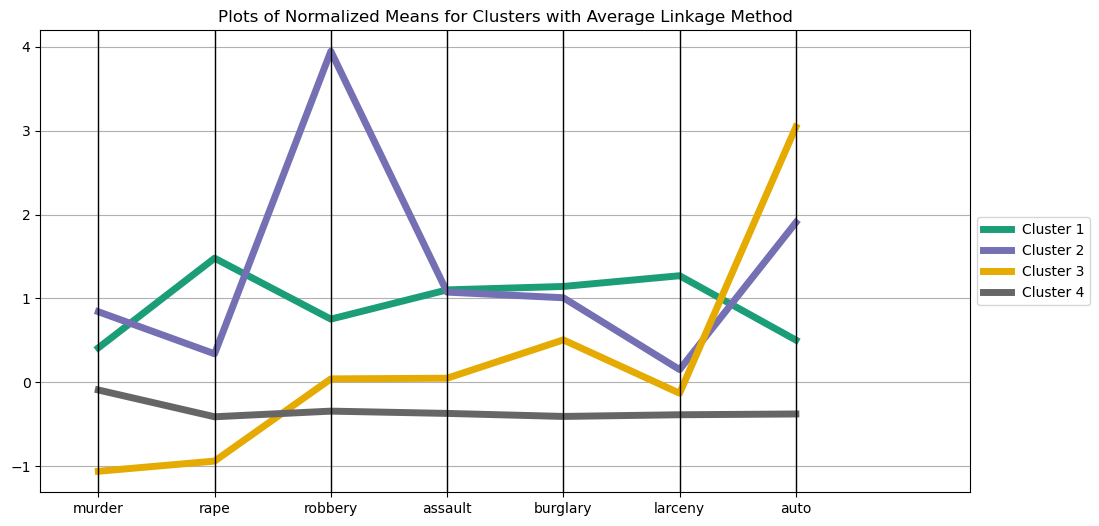

In [9]:
# Display profile plots for normalized means for each cluster and
# each input variable (measurement).
plt.figure(figsize=(12,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(clust_mean_norm, class_column='Cluster', 
                          colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(-0.5,7.5)
plt.title('Plots of Normalized Means for Clusters with Average Linkage Method')
plt.show()


Heatmap for Utulities Hiarachical Clustering with Average Linkage Method


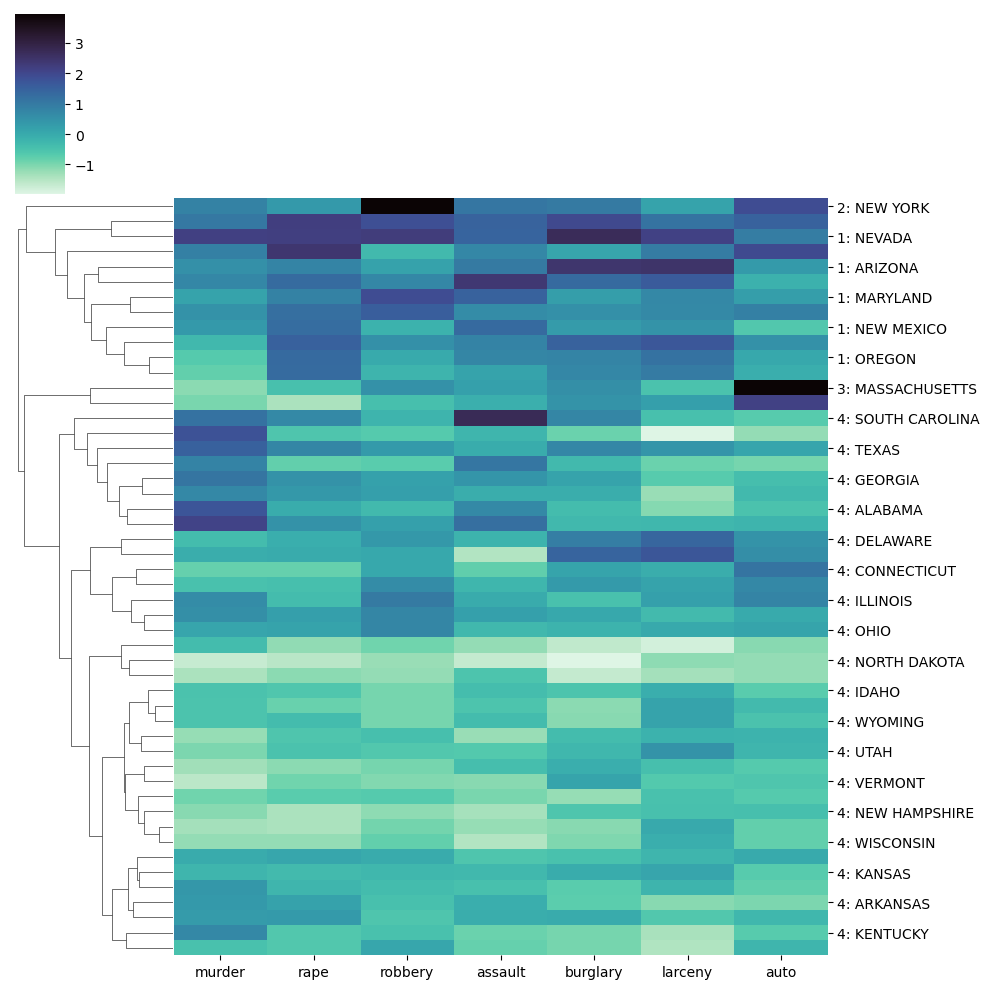

In [10]:
# Create and display heatmap for rates hierachical clustering 
# with average linkage method. 
rates_df_norm.index = ['{}: {}'.format(cluster, state) for cluster, 
                           state in zip(memb_ave, rates_df_norm.index)]
sns.clustermap(rates_df_norm, method='average', col_cluster=False,  
                          cmap="mako_r")
print('Heatmap for Utulities Hiarachical Clustering with Average Linkage Method')
plt.show()

# k-Means clustering of Utilities records into 6 clusters. 


In [11]:
# Create data frame for Utilities data set.
rates_df = pd.read_csv('Crime.csv')

# Set row names (index) to 'Company', which is Utilities
# data column name. 
rates_df.set_index('States', inplace=True)

# While not required, the conversion of integer data to float 
# will avoid a warning when applying the normalization function.
rates_df = rates_df.apply(lambda x: x.astype('float64'))

# Normalize the input variables using Pandas sample standard deviation. 
rates_df_norm = (rates_df - rates_df.mean())/rates_df.std()

# Use KMeans() function to create k-means clusters with k=6 (n_clusters=6). 
kmeans_6 = KMeans(n_clusters=6, random_state=0, n_init=1).fit(rates_df_norm)

# Develop cluster membership for k-means clusters, k=6.
memb_km6 = pd.Series(kmeans_6.labels_, index=rates_df_norm.index)

# Display cluster memberships for 6 clusters.  
print('Cluster Membership for 6 Clusters Using k-Means Clustering')
print()
for key, item in memb_km6.groupby(memb_km6):
        print(key, ': ', ', '.join(item.index))

Cluster Membership for 6 Clusters Using k-Means Clustering

0 :  IDAHO, IOWA, MAINE, MINNESOTA, MONTANA, NEBRASKA, NEW HAMPSHIRE, NORTH DAKOTA, PENNSYLVANIA, SOUTH DAKOTA, UTAH, VERMONT, WEST VIRGINIA, WISCONSIN, WYOMING
1 :  ARIZONA, CALIFORNIA, NEVADA
2 :  ALASKA, COLORADO, FLORIDA, MARYLAND, NEW MEXICO, OREGON, SOUTH CAROLINA, WASHINGTON
3 :  DELAWARE, HAWAII, ILLINOIS, MICHIGAN, MISSOURI, NEW JERSEY, NEW YORK, OHIO, TEXAS
4 :  CONNECTICUT, MASSACHUSETTS, RHODE ISLAND
5 :  ALABAMA, ARKANSAS, GEORGIA, INDIANA, KANSAS, KENTUCKY, LOUISIANA, MISSISSIPPI, NORTH CAROLINA, OKLAHOMA, TENNESSEE, VIRGINIA


# Cluster centroids, profile plots of centroids, and heatmap for k-means clustering with k = 6.

In [12]:
# Identify  and display cluster centroids (mean values)  
# for each of 8 input variables (measurements).  

# Create data frame with normalized cluster centroids for each 
# cluster and each input variable (measurement). 
centroids = pd.DataFrame(kmeans_6.cluster_centers_, 
                    columns=rates_df_norm.columns)

# Add cluster titles (Cluster 1, Cluster 2, ...) to the 
# cluster_mean_norm data frame with means and get precision 
# of 3 decimals.
centroids['Cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
pd.set_option('display.precision', 3)

print('Cluster Centroids for k-Means Clustering with k = 6')
centroids

Cluster Centroids for k-Means Clustering with k = 6


,murder,rape,robbery,assault,burglary,larceny,auto,Cluster
0,-1.011,-0.941,-0.855,-0.932,-0.902,-0.490,-0.646,Cluster 0
1,1.247,1.719,1.419,1.301,2.361,1.913,0.913,Cluster 1
2,0.183,1.321,0.284,1.290,0.713,0.889,0.158,Cluster 2
3,0.356,0.199,1.039,-0.036,0.482,0.491,0.613,Cluster 3
4,-0.985,-0.902,0.048,-0.231,0.379,-0.109,2.399,Cluster 4
5,0.810,-0.059,-0.266,0.064,-0.394,-0.800,-0.586,Cluster 5


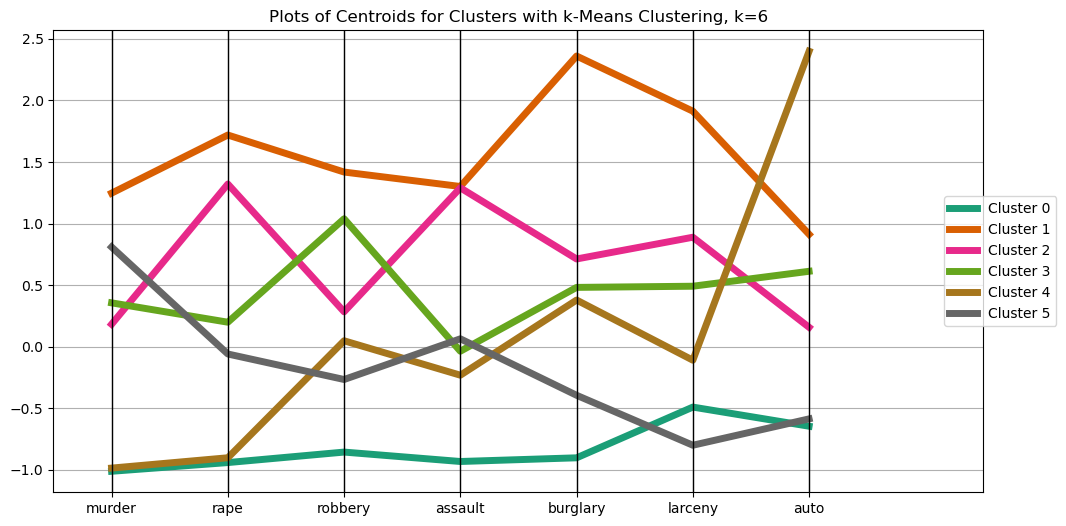

In [13]:
# Display profile plots for normalized means for each cluster and
# each input variable (measurement).
plt.figure(figsize=(12,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='Cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)
plt.title('Plots of Centroids for Clusters with k-Means Clustering, k=6')
plt.show()

Heatmap for k-Means Clustering with 6 Clusters


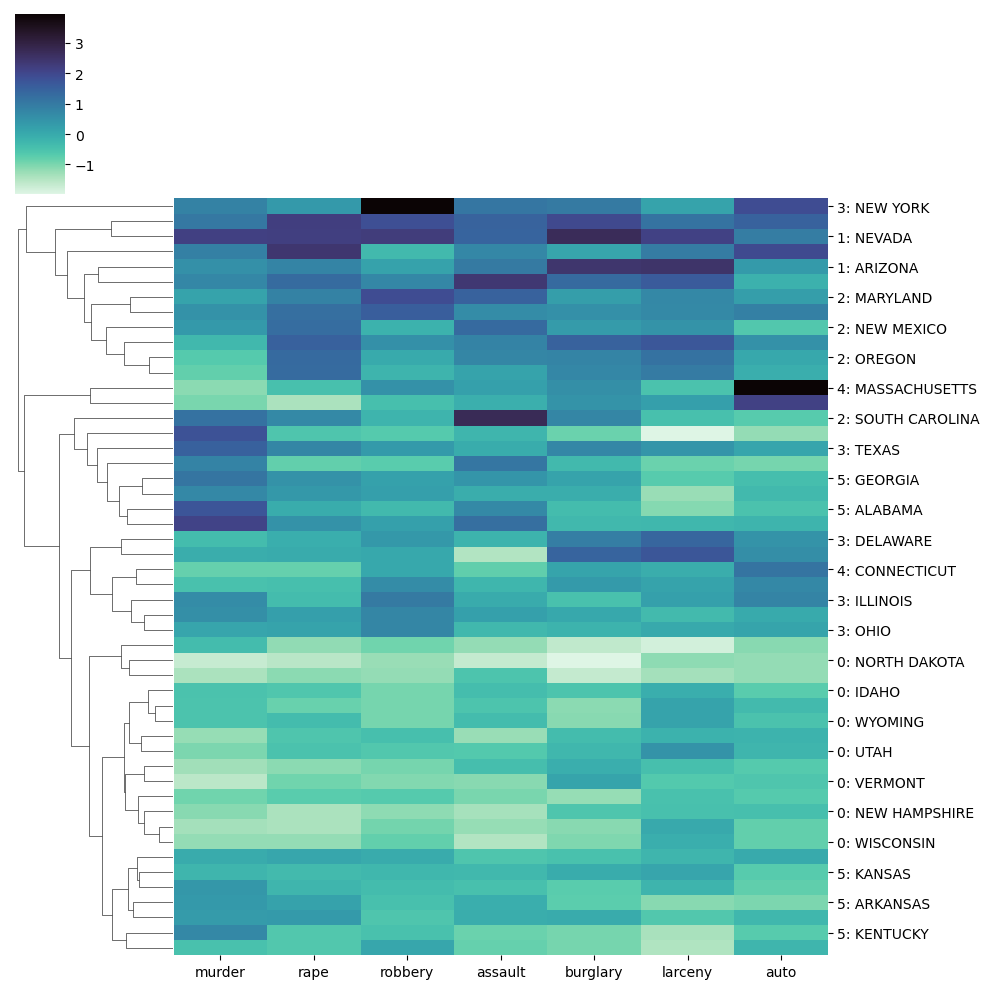

In [14]:
# Create and display heatmap for Utulities k-mean clustering 
# with centroid method. 
rates_df_norm.index = ['{}: {}'.format(cluster, state) for cluster, 
                           state in zip(memb_km6, rates_df_norm.index)]
sns.clustermap(rates_df_norm,  col_cluster=False,  
                          cmap="mako_r")
print('Heatmap for k-Means Clustering with 6 Clusters')
plt.show()

# Comparing different choices of k in terms of overall average within-cluster squared distance.

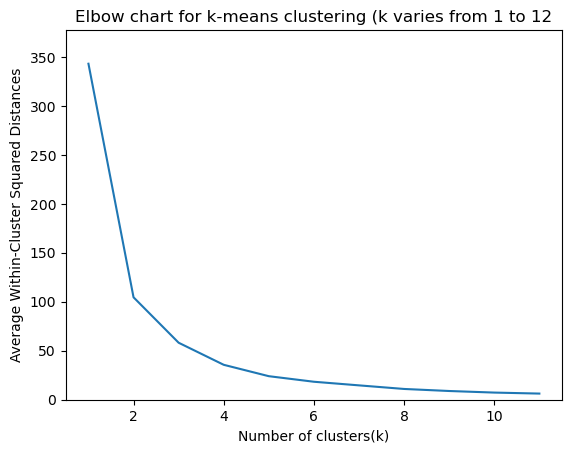

In [15]:
# Develop Elbow chart to identify appropriate k in k-Means
# clustering.

# Identify average with-cluster squred distances for k-Means 
# clusters, number of clusters k varies from 1 to 12. 
inertia = []
for n_clusters in range(1, 12):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=1).fit(rates_df_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 12), 'inertia': inertia})

# Develop and display Elbow chart to compare average within-cluster 
# squared distances using k-Means clusters with number of clusters k 
# from 1 to 12. 
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.title('Elbow chart for k-means clustering (k varies from 1 to 12')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()